loading the data with required libraries

In [1]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(url)

print(data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


By using info we are find number of rows, columns, data types of it

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Assigning Independent and Dependent variables

In [3]:
Independent = data.iloc[:,:-1].values
Dependent = data['Scores'].values


Using Matplot we are ploting along with regression line for Independent and Dependent Variables

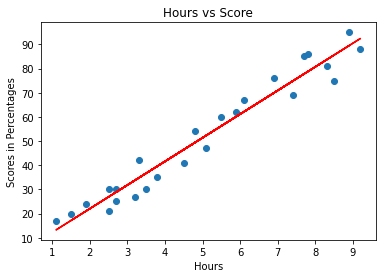

In [4]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

r = LinearRegression()

r.fit(Independent,Dependent)

trend_line = r.coef_*Independent + r.intercept_

plt.scatter(Independent,Dependent,marker='o')

plt.plot(Independent,trend_line,color = 'red')

plt.xlabel('Hours')
plt.ylabel('Scores in Percentages')

plt.title('Hours vs Score')

plt.show()

Spliting the data into Training(70%) and test(30%) sets and Training the model.

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(Independent,Dependent,test_size = 0.3, random_state = 0) 

r.fit(X_train,y_train)
r.fit(X_test,y_test)
print("data splitting and Training is completed")

data splitting and Training is completed


Finding the Accuracy rate

In [6]:
print("Accuracy for Training Model",r.score(X_train,y_train)*100)

Accuracy for Training Model 94.84682749563005


Plotting graph along with regression line for training data

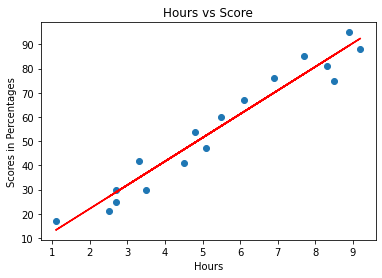

In [7]:
import matplotlib.pyplot as plt

trend_line = r.coef_*X_train + r.intercept_

plt.scatter(X_train,y_train,marker='o')

plt.plot(X_train,trend_line,color = 'red')

plt.xlabel('Hours')
plt.ylabel('Scores in Percentages')

plt.title('Hours vs Score')

plt.show()

Testing the test data and comparing with actual values

In [8]:
y_pred = r.predict(X_test)

df = pd.DataFrame({
                    'Actual_Value': y_test,
                    'Predicted_Value': y_pred
                    })
print(df)

   Actual_Value  Predicted_Value
0            20        17.272248
1            27        33.872131
2            69        74.883607
3            30        27.036885
4            62        60.236651
5            35        39.730913
6            24        21.178103
7            86        78.789461


Predicting the Score when the Hours/day is 9.25

In [9]:
y_pred = r.predict(np.array([9.25]).reshape(1,-1))
print(y_pred)

[92.94818501]


In [ ]:
Thank you